<a href="https://colab.research.google.com/github/SimpleMind-Net/Root/blob/master/Varias_Acoes_YFinance_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg as kr

## **Lista de ativos onde a regressão Kernel Gaussiana indica tendência de alta**

In [3]:
# Define the list of stocks
stocks = ["ABCP11.SA", "AIEC11.SA", "ARRI11.SA", "BARI11.SA", "BBPO11.SA", "BCFF11.SA", "BCRI11.SA", "BPML11.SA", "BRCO11.SA", "BRCR11.SA", "BTCR11.SA", "BTLG11.SA", "CBOP11.SA", "CPFF11.SA", "CVBI11.SA", "FLMA11.SA", "GGRC11.SA", "HABT11.SA", "HCTR11.SA", "HFOF11.SA", "HGBS11.SA", "HGCR11.SA", "HGFF11.SA", "HGLG11.SA", "HGRE11.SA", "HGRU11.SA", "HSML11.SA", "IRDM11.SA", "JSRE11.SA", "KNCR11.SA", "KNHY11.SA", "KNIP11.SA", "KNRI11.SA", "KNSC11.SA", "LVBI11.SA", "MCCI11.SA", "MGFF11.SA", "MORE11.SA", "MXRF11.SA", "OUJP11.SA", "RBRF11.SA", "RBRP11.SA", "RBRR11.SA", "RBVA11.SA", "RBVO11.SA", "RCRB11.SA", "RDPD11.SA", "RECR11.SA", "RECT11.SA", "SARE11.SA", "SPTW11.SA", "TGAR11.SA", "TRXF11.SA", "VCJR11.SA", "VGIP11.SA", "VILG11.SA", "VINO11.SA", "VISC11.SA", "VRTA11.SA", "VTLT11.SA", "XPCI11.SA", "XPCM11.SA", "XPLG11.SA", "XPML11.SA", "XPPR11.SA", "XPSF11.SA", "A1MD34.SA", "A1UA34.SA", "AALR3.SA", "AAPL34.SA", "ABCB4.SA", "ABEV3.SA", "AERI3.SA", "AESB3.SA", "AGRO3.SA", "AGXY3.SA", "AIRB34.SA", "ALLD3.SA", "ALPA4.SA", "ALPK3.SA", "ALSO3.SA", "ALUP11.SA", "AMAR3.SA", "AMBP3.SA", "AMER3.SA", "AMZO34.SA", "ANIM3.SA", "ARZZ3.SA", "ASAI3.SA", "ASML34.SA", "ATTB34.SA", "ATVI34.SA", "AURE3.SA", "AVGO34.SA", "AVLL3.SA", "AXPB34.SA", "AZUL4.SA", "B1AM34.SA", "B1NT34.SA", "B3SA3.SA", "BBAS3.SA", "BBDC4.SA", "BBSE3.SA", "BEEF3.SA", "BERK34.SA", "BIDU34.SA", "BIGF39.SA", "BKNG34.SA", "BLAK34.SA", "BLAU3.SA", "BMOB3.SA", "BOAC34.SA", "BOAS3.SA", "BOVA11.SA", "BPAC11.SA", "BPAN4.SA", "BRAP4.SA", "BRBI11.SA", "BRFS3.SA", "BRIT3.SA", "BRKM5.SA", "BRPR3.SA", "BXTC39.SA", "C1FI34.SA", "C1TV34.SA", "C2OI34.SA", "CAML3.SA", "CASH3.SA", "CATP34.SA", "CBAV3.SA", "CCRO3.SA", "CEAB3.SA", "CGRA3.SA", "CHVX34.SA", "CIEL3.SA", "CLSA3.SA", "CMCS34.SA", "CMIG4.SA", "CMIN3.SA", "COCA34.SA", "COGN3.SA", "COPH34.SA", "CPFE3.SA", "CPLE6.SA", "CRFB3.SA", "CSAN3.SA", "CSCO34.SA", "CSED3.SA", "CSMG3.SA", "CSNA3.SA", "CURY3.SA", "CVCB3.SA", "CXSE3.SA", "CYRE3.SA", "D1IS34.SA", "D1VN34.SA", "DASA3.SA", "DEEC34.SA", "DESK3.SA", "DIRR3.SA", "DISB34.SA", "DMVF3.SA", "DOTZ3.SA", "DXCO3.SA", "ECOR3.SA", "EGIE3.SA", "ELMD3.SA", "EMBR3.SA", "ENAT3.SA", "ENBR3.SA", "ENEV3.SA", "ENGI11.SA", "ENJU3.SA", "EQTL3.SA", "ESPA3.SA", "ETER3.SA", "EUCA4.SA", "EVEN3.SA", "EXXO34.SA", "EZTC3.SA", "F1NI34.SA", "FCXO34.SA", "FESA4.SA", "FHER3.SA", "FIND11.SA", "FIQE3.SA", "FLRY3.SA", "FOXC34.SA", "FRAS3.SA", "FSLR34.SA", "G1PI34.SA", "G2DI33.SA", "GFSA3.SA", "GGBR4.SA", "GGPS3.SA", "GMAT3.SA", "GOAU4.SA", "GOGL34.SA", "GOLD11.SA", "GOLL4.SA", "GPRO34.SA", "GRND3.SA", "GSGI34.SA", "GUAR3.SA", "HAPV3.SA", "HBOR3.SA", "HBSA3.SA", "HONB34.SA", "HOND34.SA", "HYPE3.SA", "IBMB34.SA", "IFCM3.SA", "INBR32.SA", "INTB3.SA", "ITLC34.SA", "ITSA4.SA", "ITUB4.SA", "IVVB11.SA", "JALL3.SA", "JBSS3.SA", "JHSF3.SA", "JNJB34.SA", "JPMC34.SA", "JSLG3.SA", "K2CG34.SA", "KEPL3.SA", "KLBN11.SA", "LAND3.SA", "LAVV3.SA", "LEVE3.SA", "LJQQ3.SA", "LLIS3.SA", "LOGG3.SA", "LOGN3.SA", "LREN3.SA", "LUPA3.SA", "LVTC3.SA", "LWSA3.SA", "M1NS34.SA", "M1RO34.SA", "M1TA34.SA", "MACY34.SA", "MATD3.SA", "MBLY3.SA", "MDIA3.SA", "MDNE3.SA", "MEAL3.SA", "MELI34.SA", "MELK3.SA", "MGLU3.SA", "MILS3.SA", "MLAS3.SA", "MNDL3.SA", "MOSC34.SA", "MOVI3.SA", "MRCK34.SA", "MRFG3.SA", "MRVE3.SA", "MSCD34.SA", "MSFT34.SA", "MTRE3.SA", "MULT3.SA", "MUTC34.SA", "MYPK3.SA", "N1EM34.SA", "NEOE3.SA", "NFLX34.SA", "NGRD3.SA", "NIKE34.SA", "NINJ3.SA", "NOKI34.SA", "NTCO3.SA", "NUBR33.SA", "NVDC34.SA", "ODPV3.SA", "OFSA3.SA", "OIBR3.SA", "ONCO3.SA", "OPCT3.SA", "ORVR3.SA", "P2IN34.SA", "PAGS34.SA", "PARD3.SA", "PCAR3.SA", "PEPB34.SA", "PETR3.SA", "PETR4.SA", "PETZ3.SA", "PFIZ34.SA", "PFRM3.SA", "PGCO34.SA", "PGMN3.SA", "PLPL3.SA", "PNVL3.SA", "POMO4.SA", "POSI3.SA", "PRIO3.SA", "PSSA3.SA", "PTBL3.SA", "PYPL34.SA", "QCOM34.SA", "QUAL3.SA", "R2BL34.SA", "RADL3.SA", "RAIL3.SA", "RAIZ4.SA", "RANI3.SA", "RAPT4.SA", "RDOR3.SA", "RECV3.SA", "RENT3.SA", "RIOT34.SA", "ROMI3.SA", "RRRP3.SA", "S1BS34.SA", "S1NP34.SA", "S1PO34.SA", "S2EA34.SA", "S2HO34.SA", "S2QU34.SA", "SANB11.SA", "SBFG3.SA", "SBSP3.SA", "SBUB34.SA", "SCAR3.SA", "SEER3.SA", "SEQL3.SA", "SHOW3.SA", "SHUL4.SA", "SIMH3.SA", "SLCE3.SA", "SMFT3.SA", "SMTO3.SA", "SNEC34.SA", "SOJA3.SA", "SOMA3.SA", "SQIA3.SA", "SSFO34.SA", "STBP3.SA", "SUZB3.SA", "TAEE11.SA", "TCSA3.SA", "TECN3.SA", "TEND3.SA", "TEXA34.SA", "TGMA3.SA", "TIMS3.SA", "TMCO34.SA", "TOTS3.SA", "TRAD3.SA", "TRIS3.SA", "TRPL4.SA", "TSLA34.SA", "TSMC34.SA", "TTEN3.SA", "TUPY3.SA", "TXSA34.SA", "U2ST34.SA", "UGPA3.SA", "ULEV34.SA", "UNIP3.SA", "UPSS34.SA", "USSX34.SA", "VALE3.SA", "VAMO3.SA", "VBBR3.SA", "VERZ34.SA", "VIIA3.SA", "VISA34.SA", "VITT3.SA", "VIVA3.SA", "VIVT3.SA", "VLID3.SA", "VULC3.SA", "VVEO3.SA", "W1DA34.SA", "WALM34.SA", "WEGE3.SA", "WEST3.SA", "WFCO34.SA", "WIZS3.SA", "XFIX11.SA", "XINA11.SA", "XPBR31.SA", "YDUQ3.SA"]

In [ ]:
# Create an empty list to store the results
results = []

# Loop over each stock code in the list
for stock in stocks:
    # Fetch 80-days historical data from Yahoo Finance
    data = yf.download(stock, period="80d", interval="1d")["Adj Close"]

    if len(data) > 5:
       # Applying non-parametric kernel Gaussian regression to estimate of the data points and converting into a vector
        kernel_est = kr(endog=data, exog=np.arange(len(data))+1, var_type='c', bw=[11]).fit()
        kernel_est = np.array(kernel_est[0])

        # Calculate the slope of the two most recent points of the regressed line
        slope = kernel_est[-1] - kernel_est[-2]

        # If the regressed line rising, append the stock code to the results list
        if slope > 0: results.append(stock.replace(".SA", ""))

# Print the results
for result in results: print(result)

## **Gráfico da série de preços ajustados e regressão não-paramétrica Kernel para uma ação**

In [ ]:
ticker = 'RBRR11.SA'
dias=200

[*********************100%***********************]  1 of 1 completed


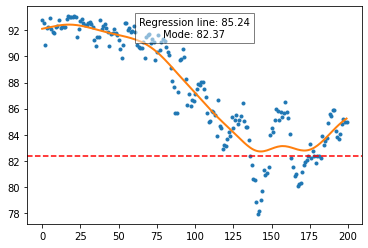

In [ ]:

# Downloading (default: 200 days) the adjusted closing prices for a ticker
def get_quotes(ticker, dias=200):
    data = yf.download(ticker, period=f"{dias}d")
    return data['Adj Close'].dropna().values

data = get_quotes(ticker, dias)

# Converting the series into a vector
data = np.array(data)

# Cleaning missing data
data = data[~np.isnan(data)]

# Calculating mode of data
data_mode = pd.Series(data).mode()[0]

# Applying non-parametric kernel Gaussian regression to estimate of the data points and converting into a vector
kernel_est = kr(endog=data, exog=np.arange(len(data))+1, var_type='c', bw=[11]).fit()
kernel_est = np.array(kernel_est[0])

# Plotting the data and kernel estimate line
plt.plot(data, 'o', markersize=3, label='Adjusted Close Prices')
plt.plot(kernel_est, linewidth=2, label='Kernel Estimate')

# Adding the mode line
plt.axhline(y=data_mode, color='red', linestyle='--', label='Mode')

# Adding box with regression line and mode values
plt.text(0.5, 0.9, f"Regression line: {round(kernel_est[-1], 2)}\nMode: {round(data_mode, 2)}", ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Saving the graphic as a png file
#plt.savefig('graph.png', dpi=300)

# Displaying the graphic
plt.show()